In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Clustering\Clustering\heart_disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:

print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)  

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [9]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [11]:
df.drop(columns=['num'], inplace=True)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [13]:
# Identify categorical columns
categorical_columns = ['cp','sex','restecg','exang','slope','thal']
print(categorical_columns)  

['cp', 'sex', 'restecg', 'exang', 'slope', 'thal']


In [14]:
# Initialize the encoder
label_encoder = LabelEncoder()


In [15]:

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233   True        0     150      0      2.3   
1     41    1   1       135   203  False        1     132      0      0.0   
2     57    1   0       140   192  False        1     148      0      0.4   
3     52    1   3       118   186  False        0     190      0      0.0   
4     57    1   0       110   201  False        1     126      1      1.5   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...      ...   
903   53    1   0       125     0  False        1     120      0      1.5   
904   62    1   0       166   170  False        2     120      1      3.0   
905   56    1   2       170     0  False        0     123      1      2.5   
906   56    1   2       144   208   True        2     105      2      0.5   
907   57    1   0       142   277   True        2     182      0      0.5   

     slope  thal  
0        0     0  
1        1     0  
2        1     0  

In [16]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df[categorical_columns].quantile(0.25)
Q3 = df[categorical_columns].quantile(0.75)
IQR = Q3 - Q1


In [17]:

# Calculate lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:

# Filter out rows where any of the columns have values outside the bounds
data = df[~((df[categorical_columns] < lower_bound) | (df[categorical_columns] > upper_bound)).any(axis=1)]


In [19]:

# Check the result
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {data.shape}")

Original data shape: (908, 12)
Filtered data shape: (426, 12)


In [20]:
# Split dataset into features and target
X = data.drop('thal', axis=1)  # Features
y = data['thal']  # Target variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Instantiate the scaler
scaler = StandardScaler()



In [23]:
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Check the shape to ensure scaling was applied
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_train shape: (340, 11)
Scaled X_test shape: (86, 11)


In [25]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [26]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)


In [27]:

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [28]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [29]:
# Get the best parameters and the best cross-validation score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.4294117647058823


In [30]:
# Using the best parameters to initialize the model
best_rf_model = RandomForestClassifier(
    max_depth=20, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200, 
    random_state=42
)

In [31]:

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [32]:
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)


In [33]:

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.45348837209302323
Confusion Matrix:
[[ 6  5 12]
 [ 1 15 15]
 [ 5  9 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        23
           1       0.52      0.48      0.50        31
           2       0.40      0.56      0.47        32

    accuracy                           0.45        86
   macro avg       0.47      0.44      0.44        86
weighted avg       0.47      0.45      0.45        86



In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


In [35]:

# Step 3: Explained Variance
explained_variance = pca.explained_variance_ratio_


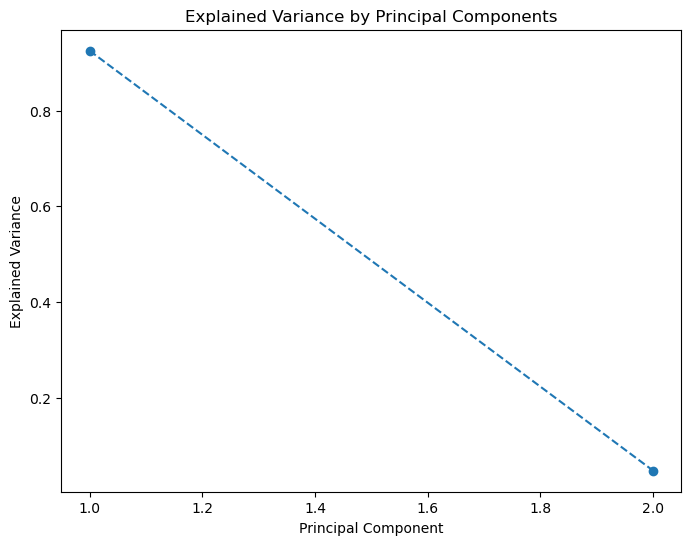

In [36]:
# Plot explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [37]:
# For example, to keep components that explain at least 95% of the variance
cumulative_variance = explained_variance.cumsum()
n_components = (cumulative_variance < 0.95).sum() + 1


In [38]:

print(f"Number of components to explain 95% of variance: {n_components}")


Number of components to explain 95% of variance: 2


In [39]:
# Step 5: Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


In [40]:
# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])


In [41]:
# Show the resulting DataFrame
print(pca_df.head())

         PC1        PC2
0  12.109850  -2.571418
1   1.857979  10.247669
2   8.935762  -5.250281
3  84.458574 -10.661378
4  19.638246   7.141316


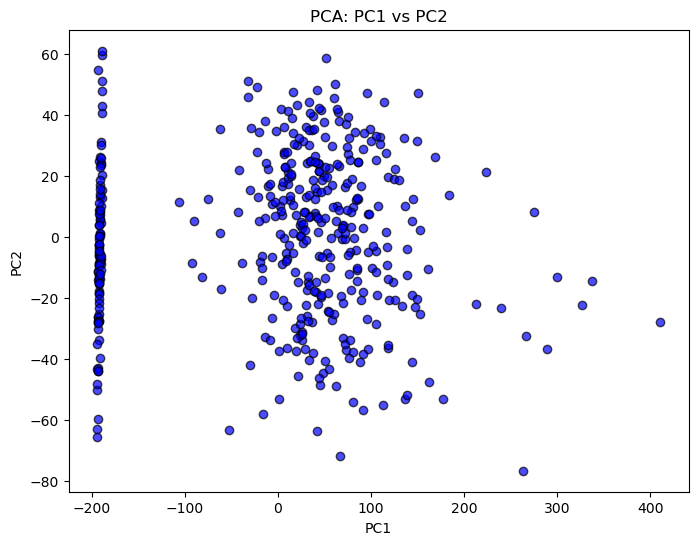

In [42]:
# Assuming pca_df is the DataFrame with your principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolors='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.show()

In [43]:
# Using the best parameters found from GridSearchCV
best_rf = RandomForestClassifier(
    max_depth=None, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=10, 
    n_estimators=200, 
    random_state=42
)

In [44]:

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.4884
Confusion Matrix:
[[ 6  7 10]
 [ 0 17 14]
 [ 4  9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       0.52      0.55      0.53        31
           2       0.44      0.59      0.51        32

    accuracy                           0.49        86
   macro avg       0.52      0.47      0.47        86
weighted avg       0.51      0.49      0.48        86



INTERVIEW QUESTIONS:-
Common Hyperparameters in Decision Tree Models:-

1. Maximum Depth (max_depth):-
Effect:
Shallow Trees: Low depth can lead to underfitting because the model lacks capacity to capture complex patterns.
Deep Trees: High depth can lead to overfitting, as the tree captures noise in the training data.

2. Minimum Samples Split:-
Effect:
High Value: Results in fewer splits, creating a simpler tree and reducing overfitting.
Low Value: Allows more splits, increasing model complexity but risking overfitting.
3. Minimum Samples per Leaf:-
Effect:
High Value: Creates larger leaf nodes, simplifying the model and reducing overfitting.
Low Value: Allows smaller leaf nodes, increasing model complexity but risking overfitting.
4. Maximum Number of Features:-
Effect:
Low Value: Reduces model complexity, helping prevent overfitting.
High Value: Allows the tree to consider more features, potentially capturing more
5. Maximum Number of Leaf Nodes:-
Effect:
Helps control tree size and complexity, reducing overfitting.
Smaller trees may underfit the data.
6. Minimum Impurity Decrease:-
Effect:
Higher values create simpler trees by preventing unnecessary splits.
Helps reduce overfitting in noisy datasets.
7. Splitting Criterion:-
Effect:
Choice of criterion can slightly affect the decision boundaries and model performance.
8. Random State:-
Effect:
Ensures reproducibility of results when the dataset or feature splits are random.
9. Class Weight:-
Effect:
Helps the model pay more attention to minority classes, improving performance on imbalanced datasets.
10. Splitter:-
Effect:
"best" typically results in higher accuracy but can be slower.
"random" can lead to more diverse trees and might prevent overfitting in some cases.

2.Label Encoding:-
Label Encoding converts each category in a categorical variable into a unique integer (numeric label).

One-Hot Encoding
One-Hot Encoding creates binary columns for each category in the feature, where each category is represented by a 1 or 0 in a new column.